# Importing libraries & Reading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
# Ignore warnings
warnings.filterwarnings('ignore')

In [2]:
from decimal import Decimal, ROUND_HALF_UP

In [3]:
import decimal
precision = decimal.Decimal('0.01')

In [4]:
pd.set_option('display.precision', 2)

In [51]:
df = pd.read_csv('realtor-data.zip.csv')

In [6]:
df.head(20)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
5,for_sale,4.0,3.0,0.46,San Sebastian,Puerto Rico,612.0,2520.0,NaN,179000.0
6,for_sale,3.0,1.0,0.20,Ciales,Puerto Rico,639.0,2040.0,NaN,50000.0
7,for_sale,3.0,2.0,0.08,Ponce,Puerto Rico,731.0,1050.0,NaN,71600.0
8,for_sale,2.0,1.0,0.09,Ponce,Puerto Rico,730.0,1092.0,NaN,100000.0
9,for_sale,5.0,3.0,7.46,Las Marias,Puerto Rico,670.0,5403.0,NaN,300000.0


In [7]:
df.sample(20)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
991165,for_sale,NaN,NaN,0.30,Sloatsburg,New York,10974.0,NaN,NaN,3.00e+04
202212,for_sale,3.0,2.0,0.47,East Falmouth,Massachusetts,2536.0,984.0,2005-09-19,4.49e+05
1356362,for_sale,5.0,2.0,0.24,West Winfield,New York,13491.0,2398.0,NaN,1.75e+05
773383,for_sale,4.0,2.0,0.08,Clifton,New Jersey,7011.0,NaN,1999-10-04,6.50e+05
1131102,for_sale,5.0,4.0,0.40,Southampton,New York,11968.0,4700.0,2004-08-17,7.45e+06
337867,for_sale,NaN,NaN,2.10,Thetford,Vermont,5074.0,NaN,NaN,1.99e+05
1234694,for_sale,NaN,NaN,47.90,Red Hook,New York,12571.0,NaN,2002-01-06,3.50e+05
1175029,for_sale,3.0,1.0,0.30,Albany,New York,12205.0,1125.0,NaN,3.00e+05
653683,for_sale,3.0,2.0,0.14,Blackwood,New Jersey,8012.0,1321.0,1994-10-13,2.70e+05
180224,for_sale,2.0,3.0,NaN,Boston,Massachusetts,2128.0,1175.0,NaN,6.89e+05


**Data Description:**
- **Status**: (for_sale/ready to build)
- **Bed**: (number of bedrooms)
- **Bath**: (Number of bathrooms)
- **acre_lot**: (land size measured in acre)
- **Address**: city, state, zip_code
- **House_size**: living space in square feet
- **Prev_sold_date**: Date of the previous sale
- **Price**: Current listing price


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401066 entries, 0 to 1401065
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   status          1401066 non-null  object 
 1   bed             1184538 non-null  float64
 2   bath            1206853 non-null  float64
 3   acre_lot        1043599 non-null  float64
 4   city            1400875 non-null  object 
 5   state           1401066 non-null  object 
 6   zip_code        1400587 non-null  float64
 7   house_size      950954 non-null   float64
 8   prev_sold_date  714773 non-null   object 
 9   price           1400958 non-null  float64
dtypes: float64(6), object(4)
memory usage: 106.9+ MB


# Data **preprocessing**

In [9]:
df['bed'].unique()

array([  3.,   4.,   2.,   6.,   5.,   1.,   9.,  nan,   7.,   8.,  12.,
        13.,  10.,  11.,  33.,  24.,  28.,  14.,  18.,  20.,  16.,  15.,
        19.,  17.,  40.,  21.,  86.,  31.,  27.,  42.,  60.,  22.,  32.,
        99.,  49.,  29.,  30.,  23.,  46.,  36.,  68., 123.,  25.,  47.,
        35.,  38.,  64.,  48.,  75.])

In [10]:
#df['bed'] = df['bed'].apply(lambda x: Decimal(x).quantize(precision))

In [11]:
df['bath'].unique()

array([  2.,   1.,   3.,   5.,   4.,   7.,   6.,  nan,   8.,   9.,  10.,
        12.,  13.,  35.,  11.,  16.,  15.,  18.,  20.,  14.,  36.,  25.,
        17.,  19.,  56.,  42.,  51.,  28., 198.,  22.,  33.,  27.,  30.,
        29.,  24.,  46.,  21., 123.,  39.,  43.,  32.,  45.,  64.])

In [12]:
#df['bath'] = df['bath'].apply(lambda x: Decimal(x).quantize(precision))

**since bath/bed columns are num.00 we will only change their datatypes from float to interger**

In [13]:
df['bed']=df['bed'].fillna(0)
df['bath']=df['bath'].fillna(0)

In [14]:
df['bed'] = df['bed'].astype(int)

In [15]:
df['bath'] = df['bath'].astype(int)

In [16]:
df['bed'].unique()

array([  3,   4,   2,   6,   5,   1,   9,   0,   7,   8,  12,  13,  10,
        11,  33,  24,  28,  14,  18,  20,  16,  15,  19,  17,  40,  21,
        86,  31,  27,  42,  60,  22,  32,  99,  49,  29,  30,  23,  46,
        36,  68, 123,  25,  47,  35,  38,  64,  48,  75])

In [17]:
df['bath'].unique()

array([  2,   1,   3,   5,   4,   7,   6,   0,   8,   9,  10,  12,  13,
        35,  11,  16,  15,  18,  20,  14,  36,  25,  17,  19,  56,  42,
        51,  28, 198,  22,  33,  27,  30,  29,  24,  46,  21, 123,  39,
        43,  32,  45,  64])

**changing zipcode column datatype from float to string**

*   we dont neet this column in any calculation
*   we want the model to understand its not an integer


we dont need zipcode column in any calculation and we want the model to understand it is an address so we will change its datatype into string

In [18]:
df['zip_code'] = df['zip_code'].astype(str)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401066 entries, 0 to 1401065
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   status          1401066 non-null  object 
 1   bed             1401066 non-null  int32  
 2   bath            1401066 non-null  int32  
 3   acre_lot        1043599 non-null  float64
 4   city            1400875 non-null  object 
 5   state           1401066 non-null  object 
 6   zip_code        1401066 non-null  object 
 7   house_size      950954 non-null   float64
 8   prev_sold_date  714773 non-null   object 
 9   price           1400958 non-null  float64
dtypes: float64(3), int32(2), object(5)
memory usage: 96.2+ MB


**Checking and dealing with nulls**

In [20]:
df['ID'] = range(1, len(df) + 1)
df = df[['ID'] + [col for col in df.columns if col != 'ID']]

In [21]:
Null_ID=[]
for col in df:
    nulls=df[col].isnull()
    Null_ID.extend(df.loc[nulls, 'ID'].tolist())
    print(f'Nulls  in {col}: \n{nulls.sum()}\n')
    percentage=(nulls.sum()/len(df))*100
    print(f'Percentage of nulls  in {col}: \n{percentage}\n')

Nulls  in ID: 
0

Percentage of nulls  in ID: 
0.0

Nulls  in status: 
0

Percentage of nulls  in status: 
0.0

Nulls  in bed: 
0

Percentage of nulls  in bed: 
0.0

Nulls  in bath: 
0

Percentage of nulls  in bath: 
0.0

Nulls  in acre_lot: 
357467

Percentage of nulls  in acre_lot: 
25.513930107503857

Nulls  in city: 
191

Percentage of nulls  in city: 
0.013632476985381132

Nulls  in state: 
0

Percentage of nulls  in state: 
0.0

Nulls  in zip_code: 
0

Percentage of nulls  in zip_code: 
0.0

Nulls  in house_size: 
450112

Percentage of nulls  in house_size: 
32.126395187664244

Nulls  in prev_sold_date: 
686293

Percentage of nulls  in prev_sold_date: 
48.98363103522603

Nulls  in price: 
108

Percentage of nulls  in price: 
0.00770841630586996



In [22]:
#filling the nulls by the mean of each  numerical column
df['bed'] = df['bed'].replace(0,np. round(df['bed'][df['bed'] != 0].mean()))
df['bath'] = df['bath'].replace(0,np.round( df['bath'][df['bath'] != 0].mean()))
df['acre_lot'].fillna(df['acre_lot'].mean(), inplace=True)
df['house_size'].fillna(df['house_size'].mean(), inplace=True)

In [23]:
df.isnull().sum()

ID                     0
status                 0
bed                    0
bath                   0
acre_lot               0
city                 191
state                  0
zip_code               0
house_size             0
prev_sold_date    686293
price                108
dtype: int64

In [24]:
#droping the previous sold date column as the nulls is almost 50%
df = df.drop('prev_sold_date', axis=1)

In [25]:
#droping the nulls that in zip code , city and price as nulls are very little
df=df.dropna(subset=['zip_code','city','price'])

In [26]:
df.isnull().sum()

ID            0
status        0
bed           0
bath          0
acre_lot      0
city          0
state         0
zip_code      0
house_size    0
price         0
dtype: int64

**Checking and dealing with outliers**

In [27]:
column=['bed','bath','acre_lot','house_size','price']

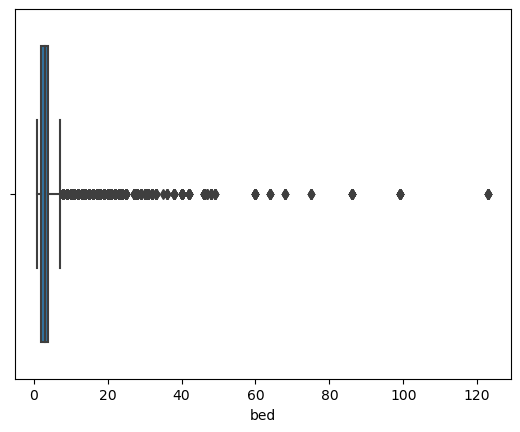

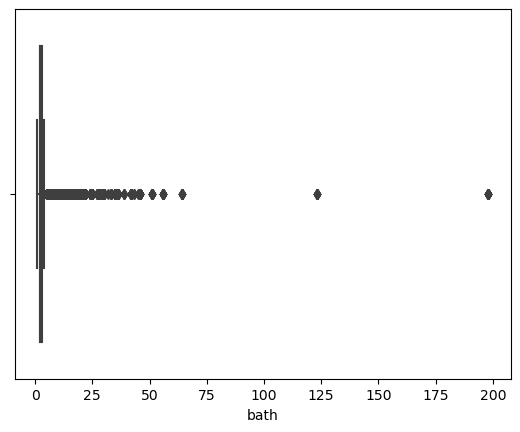

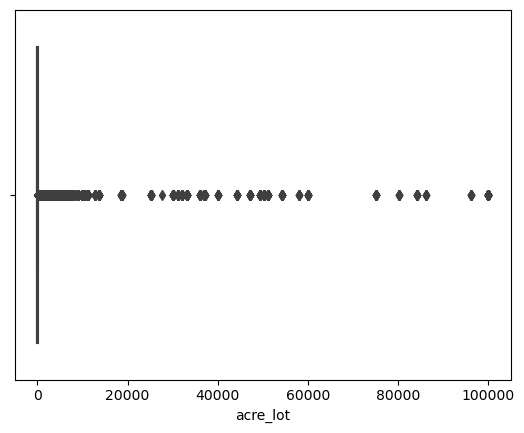

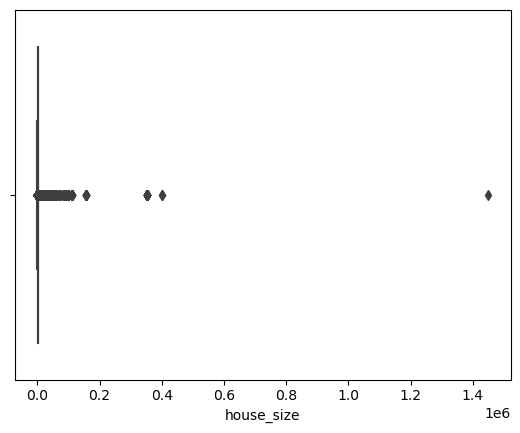

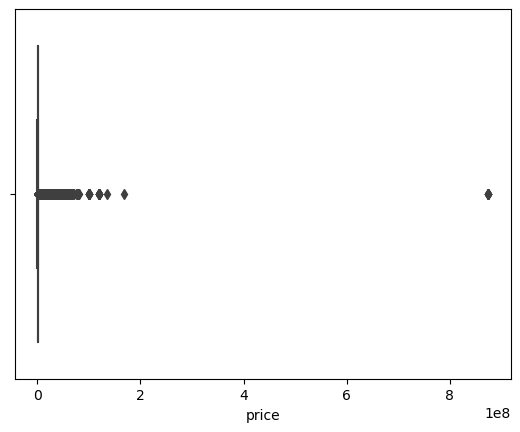

In [28]:
for col in column:
  sns.boxplot(x=df[col])
  plt.show()

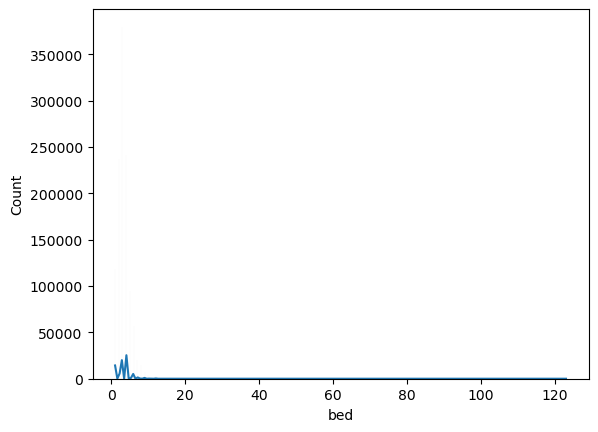

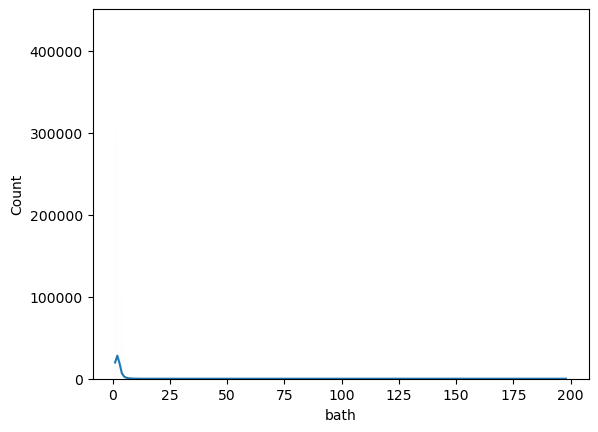

In [ ]:
# Checking distribution of columns which have outliers
for col in column:

    sns.histplot(x = df[col], kde=True)
    plt.show()

In [ ]:
# Fixing skewness using log transformation
for col in column:

    sns.boxenplot(x=np.log1p(df[col]))
    plt.show()
    sns.histplot(x=np.log1p(df[col]),kde=True)
    plt.show()

In [31]:
['bed','bath','acre_lot','house_size','price']

print("bed")
Q1_bed,Q3_bed=df['bed'].quantile([0.25,0.75])

# calculate max and min
max_bed=max(df['bed'])
min_bed=min(df['bed'])

print(max_bed)
print(min_bed)

# print(max_bed-Q3_bed)
# print(Q1_bed-min_bed)

print("bath")
Q1_bath,Q3_bath=df['bath'].quantile([0.25,0.75])

# calculate max and min
max_bath=max(df['bath'])
min_bath=min(df['bath'])

print(max_bath)
print(min_bath)
# print(max_bath-Q3_bath)
# print(Q1_bath-min_bath)

print('arce_lot')
Q1_arce,Q3_arce=df['acre_lot'].quantile([0.25,0.75])

# calculate max and min
max_arce=max(df['acre_lot'])
min_arce=min(df['acre_lot'])

print(max_arce)
print(min_arce)

# print(max_arce-Q3_arce)
# print(Q1_arce-min_arce)

print("house_size")
Q1_house,Q3_house=df['house_size'].quantile([0.25,0.75])

# calculate max and min
max_houseSize=max(df['house_size'])
min_houseSize=min(df['house_size'])

print(max_houseSize)
print(min_houseSize)
# print(max_houseSize-Q3_house)
# print(Q1_house-min_houseSize)

print('price')
Q1_price,Q3_price=df['price'].quantile([0.25,0.75])

# calculate max and min
max_price = max(df['price'])
min_price = min(df['price'])

print(max_price)
print(min_price)
# print(max_price-Q3_price)
# print(Q1_price-min_price)

bed
123
1
bath
198
1
arce_lot
100000.0
0.0
house_size
1450112.0
4.0
price
875000000.0
0.0


In [32]:
deleted = df[(df['price'] <= 1) ]['ID']


In [33]:
indices_to_drop = deleted[deleted.isin(df.index)]
df= df.drop(index=indices_to_drop)

In [34]:
df=df.sort_values(by='price')
df.head()

,ID,status,bed,bath,acre_lot,city,state,zip_code,house_size,price
871781,871782,for_sale,4,4,32.15,New York,New York,10016.0,2178.64,0.0
804278,804279,for_sale,4,4,32.15,New York,New York,10016.0,2178.64,0.0
760075,760076,for_sale,4,4,32.15,New York,New York,10016.0,2178.64,0.0
492655,492656,for_sale,4,4,32.15,New York,New York,10016.0,2178.64,0.0
828339,828340,for_sale,4,4,32.15,New York,New York,10016.0,2178.64,0.0


In [35]:
deleted=df[df['acre_lot']== 0]['ID']

In [36]:
indices_to_drop = deleted[deleted.isin(df.index)]
df = df.drop(index=indices_to_drop)

In [37]:
df=df.sort_values(by='acre_lot')
df.head()

,ID,status,bed,bath,acre_lot,city,state,zip_code,house_size,price
96692,96693,for_sale,3,1,0.0,Warwick,Rhode Island,2888.0,1284.00,389900.0
801343,801344,for_sale,1,1,0.0,Weehawken,New Jersey,7086.0,2178.64,295000.0
863034,863035,for_sale,1,1,0.0,Weehawken,New Jersey,7086.0,2178.64,295000.0
1400168,1400169,for_sale,4,3,0.0,Orchard Park,New York,14127.0,2621.00,499900.0
1043030,1043031,for_sale,1,1,0.0,Weehawken,New Jersey,7086.0,2178.64,295000.0


In [38]:
df=df.sort_values(by='ID')
df['ID']=range(1, len(df) + 1)
df.head()

,ID,status,bed,bath,acre_lot,city,state,zip_code,house_size,price
0,1,for_sale,3,2,0.12,Adjuntas,Puerto Rico,601.0,920.00,105000.0
1,2,for_sale,4,2,0.08,Adjuntas,Puerto Rico,601.0,1527.00,80000.0
2,3,for_sale,2,1,0.15,Juana Diaz,Puerto Rico,795.0,748.00,67000.0
3,4,for_sale,4,2,0.10,Ponce,Puerto Rico,731.0,1800.00,145000.0
4,5,for_sale,6,2,0.05,Mayaguez,Puerto Rico,680.0,2178.64,65000.0


In [39]:
df['acre_lot']*=4200

In [40]:
# To check outliers
Outlier_ID=[]
for col in column:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))
    print(f'Outliers number in {col}: \n{outliers.sum()}\n')
    percentage=(outliers.sum()/len(df))*100
    print(f'Percentage of Outliers  in {col}: \n{percentage}\n')

Outliers number in bed: 
35565

Percentage of Outliers  in bed: 
2.540582165848975

Outliers number in bath: 
87624

Percentage of Outliers  in bath: 
6.259411547879955

Outliers number in acre_lot: 
16075

Percentage of Outliers  in acre_lot: 
1.1483159937022993

Outliers number in house_size: 
120423

Percentage of Outliers  in house_size: 
8.602404784423763

Outliers number in price: 
127432

Percentage of Outliers  in price: 
9.103091988147522



In [41]:
# To check extreme outliers
Outlier_ID=[]
for col in column:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < (Q1 - 3 * IQR)) | (df[col] > (Q3 + 3 * IQR)))
    print(f'Outliers number in {col}: \n{outliers.sum()}\n')
    percentage=(outliers.sum()/len(df))*100
    print(f'Percentage of Outliers  in {col}: \n{percentage}\n')

Outliers number in bed: 
8726

Percentage of Outliers  in bed: 
0.6233409244818827

Outliers number in bath: 
25701

Percentage of Outliers  in bath: 
1.8359483268518069

Outliers number in acre_lot: 
8487

Percentage of Outliers  in acre_lot: 
0.6062679837357022

Outliers number in house_size: 
55939

Percentage of Outliers  in house_size: 
3.9959967882869623

Outliers number in price: 
73062

Percentage of Outliers  in price: 
5.219176555637785



In [42]:

def remove_outlier(col):

    col_sorted = col.sort_values()  
    Q1 = col_sorted.quantile(0.25)
    Q3 = col_sorted.quantile(0.75)

    IQR=Q3-Q1
    lower_bound=Q1-(3*IQR)
    upper_bound=Q3+(3*IQR)
    return lower_bound,upper_bound



-4.0 10.0


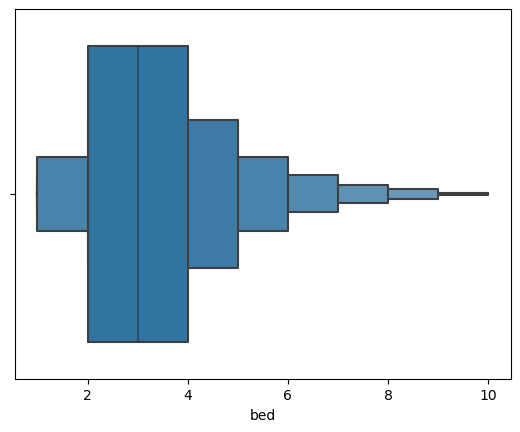

-1.0 6.0


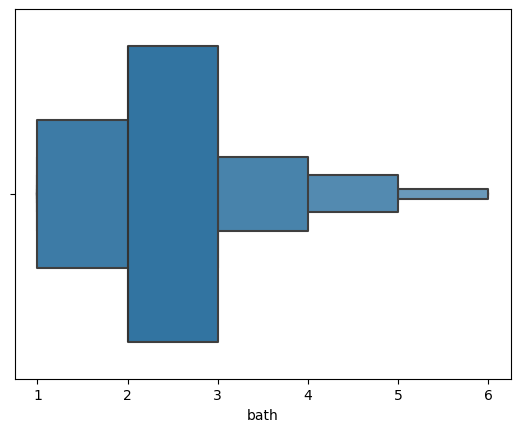

-402235.65058234544 537980.2007764606


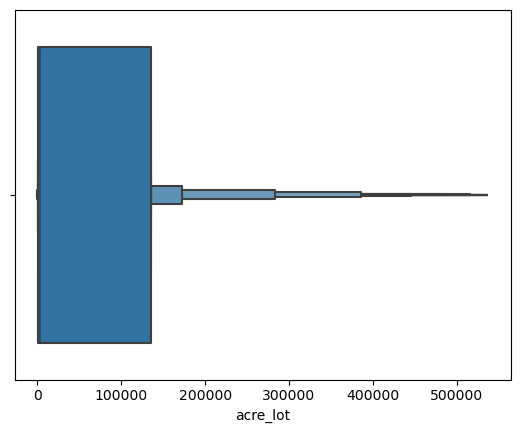

-919.9276168983993 4502.570155864532


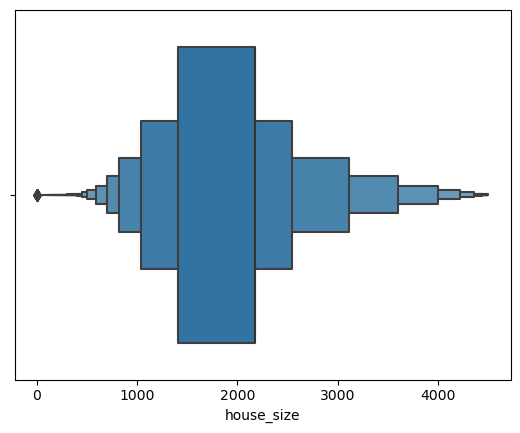

-1445000.0 2475000.0


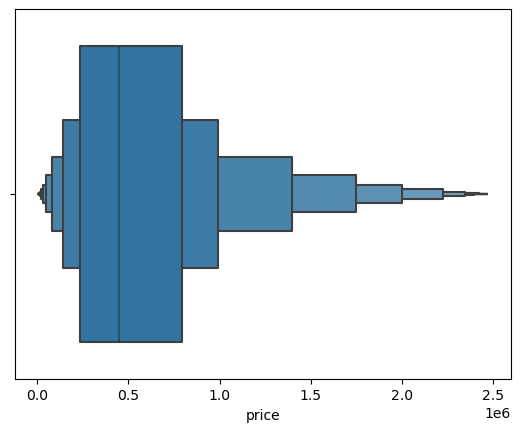

In [43]:

for col in column :
    lower_bound,upper_bound=remove_outlier(df[col])
    
    df[col]=np.where(df[col]<lower_bound,np.round(df[col].mean()),df[col])
    df[col]=np.where(df[col]>upper_bound,np.round(df[col].mean()),df[col])
    print(lower_bound,upper_bound)
    sns.boxenplot(x=df[col])
    plt.show()



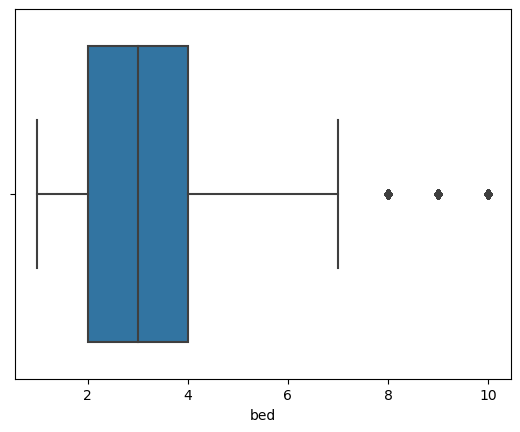

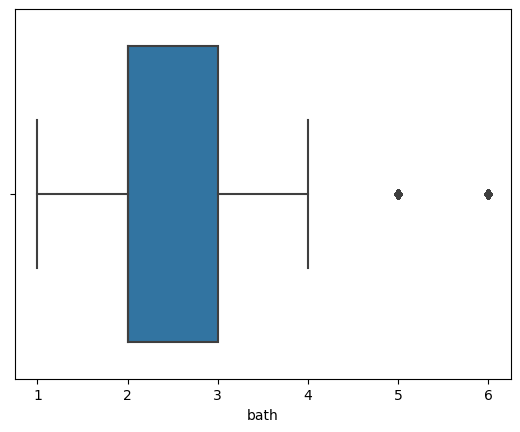

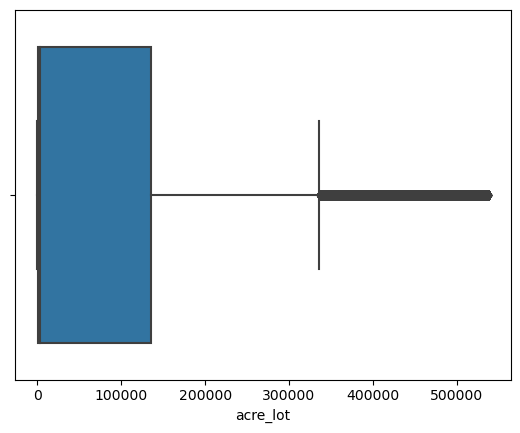

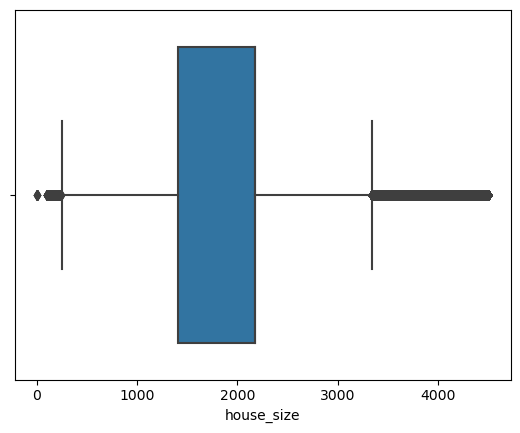

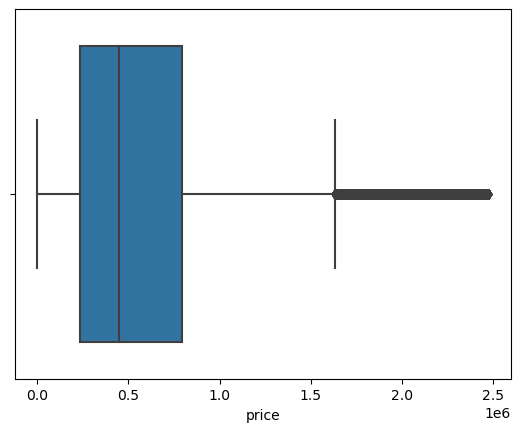

In [44]:
for col in column:
  sns.boxplot(x=df[col])
  plt.show()

In [46]:
#renaming our features
df = df.rename(columns={'land size in acre': 'land size in meter','bed':'number of bedrooms','bath':'number of bathrooms'})

In [47]:
df.head()

,ID,status,number of bedrooms,number of bathrooms,acre_lot,city,state,zip_code,house_size,price
0,1,for_sale,3.0,2.0,504.0,Adjuntas,Puerto Rico,601.0,920.00,105000.0
1,2,for_sale,4.0,2.0,336.0,Adjuntas,Puerto Rico,601.0,1527.00,80000.0
2,3,for_sale,2.0,1.0,630.0,Juana Diaz,Puerto Rico,795.0,748.00,67000.0
3,4,for_sale,4.0,2.0,420.0,Ponce,Puerto Rico,731.0,1800.00,145000.0
4,5,for_sale,6.0,2.0,210.0,Mayaguez,Puerto Rico,680.0,2178.64,65000.0


In [49]:
df.to_csv("USA_real_estate_analysis.csv")

# Credits:

This notebook is created by [Connect X](https://www.linkedin.com/company/connectx23/)
AI team.

-------------------------------------------

**Directed by:**

AI team director [Ammar Thabet](https://www.linkedin.com/in/ammar-thabett/)

**Team leader:**

[Marina Atef](https://www.linkedin.com/in/marina-atef-936a09282/)

**Team members:**

-[Seif Hassan](https://eg.linkedin.com/in/seif-hassan-8689412b4)

-[Sohier Khaled](https://www.linkedin.com/in/sohier-khaled-4a2489249?utm_source=share&utm_campaign=share_via&utm_content=profile&utm_medium=ios_app)

-[Makarious Moussa](https://www.linkedin.com/in/makarious-mousa-54b517299?utm_source=share&utm_campaign=share_via&utm_content=profile&utm_medium=ios_app)

-[Nour Hany](https://www.linkedin.com/in/nour-hany-ba83292b9?trk=contact-info)

-[Sarah Ahmad](https://www.linkedin.com/in/sarahhahmed?utm_source=share&utm_campaign=share_via&utm_content=profile&utm_medium=ios_app)